In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

# NỘI DUNG 1: (7đ) Exploratory Data Analysis - EDA

1. (0.5đ) Đoc dữ lịệu file `gapminder_tidy.csv`
2. (1đ) Tính số năm `Year`, số quốc gia `Country` và số khu vực `region` được đưa vào dữ liệu
3. (1đ) Các thuộc tính quan sát là `observed_features = ['fertility','life','child_mortality','gdp']`. Hãy vẽ đồ thị Histogram biểu diễn phân phối dữ liệu của các thuộc tính qua sát trên.
4. (1đ) Bổ sung dữ liệu rỗng trong `observed_features` với giá trị trung bình của trường dữ liệu đó. Vẽ đồ thị `boxplot` cho các trường dữ liệu trong `observed_features`.
5. (1.5đ) Vẽ biểu đồ `bar` cho các thuộc tính quan sát `observed_features` theo các khu vực và đưa ra nhận xét là khu vực nào cao nhất theo từng trường dữ liệu trong `observed_features`.
6. (1đ) Tạo tập dữ liệu mới với tên quốc gia `country` làm chỉ mục (index) và giá trị là giá trị trung bình của tất cả các thuộc tính quan sát `observed_features`.
7. (1đ) Tìm quốc gia có giá trị tối thiểu và tối đa cho từng thuộc tính


## 1. Đoc dữ lịệu file `gapminder_tidy.csv`

In [5]:
df = pd.read_csv("gapminder_tidy.csv")
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


## 2. Tính số năm `Year`, số quốc gia `Country` và số khu vực `region` được đưa vào dữ liệu

In [12]:
num_years = df["Year"].nunique()
num_countries = df["Country"].nunique()
num_regions = df["region"].nunique()
print(f"Số năm: {num_years}, Số quốc gia: {num_countries}, Số khu vực: {num_regions}")

Số năm: 50, Số quốc gia: 204, Số khu vực: 6


## 3. Các thuộc tính quan sát là `observed_features`. Hãy vẽ đồ thị Histogram biểu diễn phân phối dữ liệu của các thuộc tính qua sát trên.

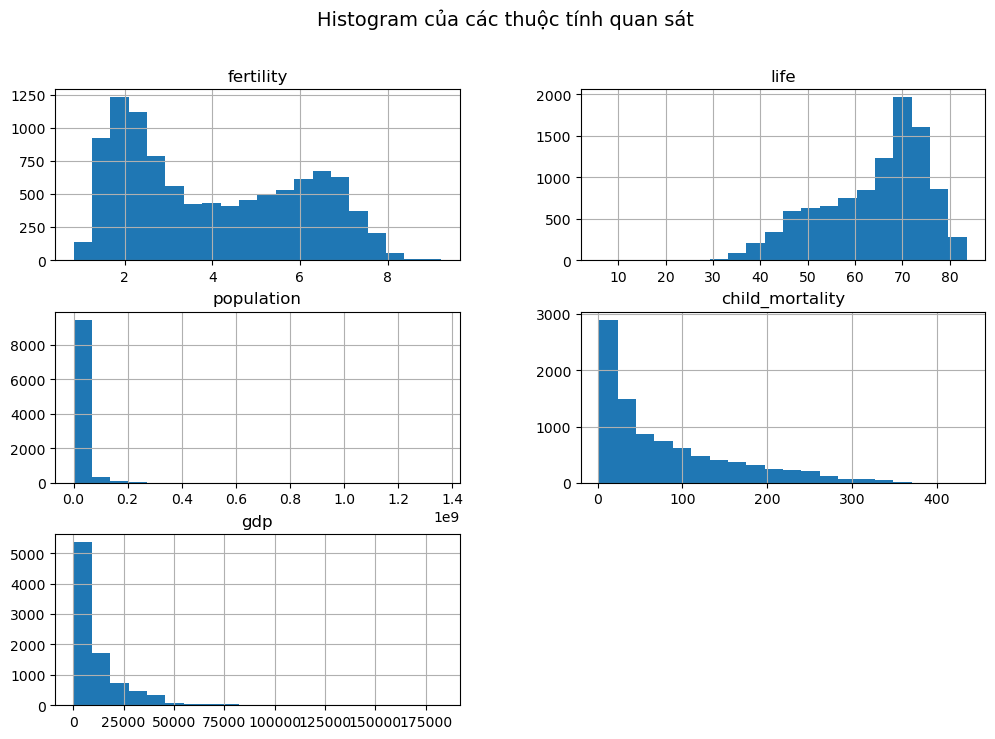

In [14]:
observed_features = ['fertility','life','population','child_mortality','gdp']
df[observed_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histogram của các thuộc tính quan sát", fontsize=14)
plt.show()


## 4. Bổ sung dữ liệu rỗng trong `observed_features` với giá trị trung bình của trường dữ liệu đó. Vẽ đồ thị `boxplot` cho các trường dữ liệu trong `observed_features`.

<Figure size 1200x600 with 0 Axes>

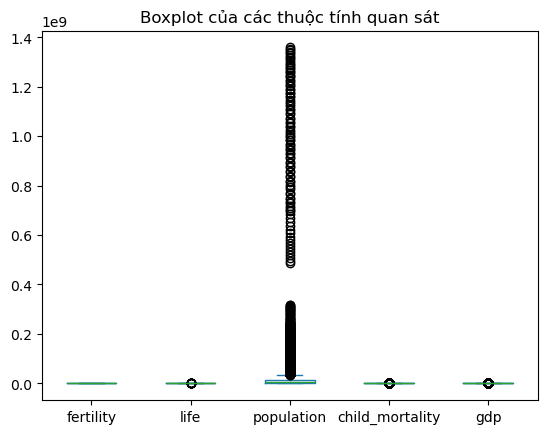

In [19]:
df.fillna(df[observed_features].mean(), inplace=True)
# Vẽ biểu đồ Boxplot cho các thuộc tính quan sát
plt.figure(figsize=(12, 6))
df[observed_features].plot(kind="box")
plt.title("Boxplot của các thuộc tính quan sát")
plt.show()

## 5. Vẽ biểu đồ `bar` cho các thuộc tính quan sát `observed_features` theo các khu vực và đưa ra nhận xét là khu vực nào cao nhất theo từng trường dữ liệu trong `observed_features`.

<Figure size 1200x800 with 0 Axes>

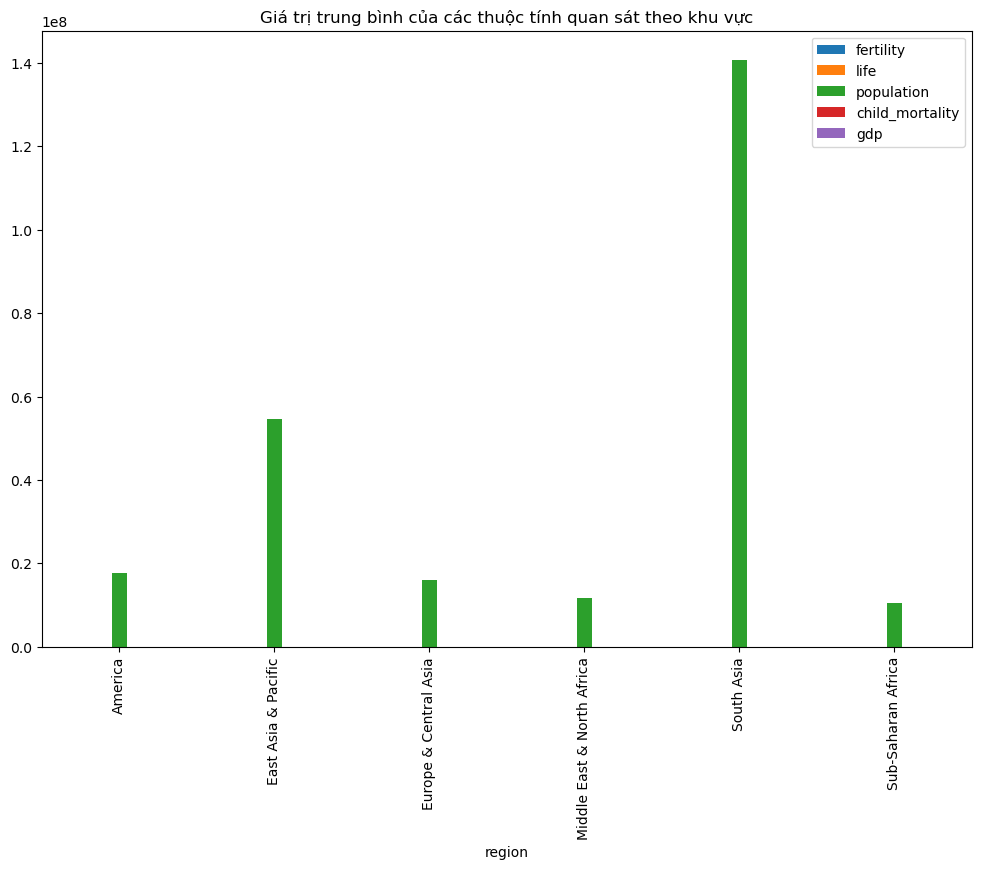

Khu vực cao nhất theo từng thuộc tính:
 fertility                  Sub-Saharan Africa
life                    Europe & Central Asia
population                         South Asia
child_mortality            Sub-Saharan Africa
gdp                Middle East & North Africa
dtype: object


In [25]:
plt.figure(figsize=(12, 8))
df_grouped = df.groupby("region")[observed_features].mean()
df_grouped.plot(kind="bar", figsize=(12, 8))
plt.title("Giá trị trung bình của các thuộc tính quan sát theo khu vực")
plt.show()
plt.figure(figsize=(12, 8))
df_grouped = df.groupby("region")[observed_features].mean()
df_grouped.plot(kind="bar", figsize=(12, 8))
plt.title("Giá trị trung bình của các thuộc tính quan sát theo khu vực")
plt.show()
# Tìm khu vực có giá trị cao nhất theo từng thuộc tính
highest_region = df_grouped.idxmax()
print("Khu vực cao nhất theo từng thuộc tính:\n", highest_region)

## 6. Tạo tập dữ liệu mới với tên quốc gia `country` làm chỉ mục (index) và giá trị là giá trị trung bình của tất cả các thuộc tính quan sát `observed_features`.

In [29]:
df_avg = df.groupby("Country")[observed_features].mean()
print(df_avg.head())

                     fertility      life   population  child_mortality  \
Country                                                                  
Afghanistan            7.35978  47.35280  18272040.82         203.1980   
Albania                3.29010  71.64512   2817009.14          57.4434   
Algeria                5.06534  62.26872  24025124.20         106.0820   
Angola                 6.98880  42.32716  10982184.30         229.6678   
Antigua and Barbuda    2.52870  70.63692     71854.68          30.9178   

                          gdp  
Country                        
Afghanistan           1187.20  
Albania               5012.52  
Algeria               9662.18  
Angola                4719.16  
Antigua and Barbuda  13765.38  


##7. Tìm quốc gia có giá trị tối thiểu và tối đa cho từng thuộc tính



In [35]:
min_countries = df_avg.idxmin()
max_countries = df_avg.idxmax()

print("\nQuốc gia có giá trị tối thiểu theo từng thuộc tính:\n", min_countries)
print("\nQuốc gia có giá trị tối đa theo từng thuộc tính:\n", max_countries)


Quốc gia có giá trị tối thiểu theo từng thuộc tính:
 fertility               Germany
life               Sierra Leone
population              Tokelau
child_mortality          Sweden
gdp                      Malawi
dtype: object

Quốc gia có giá trị tối đa theo từng thuộc tính:
 fertility          Niger
life               Åland
population         China
child_mortality     Mali
gdp                Qatar
dtype: object


# Nội Dung 2: (3đ) Phân phối xác suất

Các sản phẩm được sản xuất trong một dây chuyền. Để thực hiện kiểm tra chất
lượng, mỗi giờ người ta rút ngẫu nhiên không hoàn lại 10 sản phẩm từ một hộp có 25 sản phẩm. Quá trình sản xuất được báo cáo là đạt yêu cầu nếu có không quá một sản phẩm là thứ phẩm.

1. (1đ) Nếu tất cả các hộp được kiểm tra đều chứa chính xác hai thứ phẩm, thì xác suất quá trình sản xuất được báo cáo đạt yêu cầu ít nhất 7 lần trong một ngày làm việc 8 giờ là bao nhiêu?
2. (1đ) Sử dụng phân phối Poisson để xấp xỉ xác suất được tính trong câu (a)
3. (1đ) Biết rằng lần kiểm tra chất lượng cuối cùng trong câu (a), quá trình sản xuất được báocáo đạt yêu cầu. Hỏi xác suất mẫu 10 sản phẩm tương ứng không chứa thứ phẩm là bao nhiêu?

In [41]:
import numpy as np
from scipy.stats import hypergeom, poisson, binom
# Định nghĩa các thông số của bài toán
N = 25  # Tổng số sản phẩm trong hộp
K = 2   # Số sản phẩm lỗi
n = 10  # Số sản phẩm được chọn ngẫu nhiên mỗi giờ
hours = 8  # Số giờ kiểm tra trong ngày

# (1) Tính xác suất đạt yêu cầu mỗi lần kiểm tra (không quá 1 sản phẩm lỗi)
P_X_0 = hypergeom.pmf(0, N, K, n)  # P(X = 0)
P_X_1 = hypergeom.pmf(1, N, K, n)  # P(X = 1)
P_success = P_X_0 + P_X_1  # Xác suất đạt yêu cầu trong mỗi lần kiểm tra

# Tính xác suất đạt yêu cầu ít nhất 7 lần trong 8 giờ bằng phân phối nhị thức
P_Y = sum(binom.pmf(k, hours, P_success) for k in range(7, 9))
print(f"(1) Xác suất đạt yêu cầu ít nhất 7 lần trong 8 giờ: {P_Y:.4f}")
# (2) Xấp xỉ xác suất bằng phân phối Poisson
lambda_poisson = hours * P_success  # Trung bình số lần đạt yêu cầu
P_Y_poisson = 1 - poisson.cdf(6, lambda_poisson)  # P(Y ≥ 7)
print(f"(2) Xác suất (Poisson) đạt yêu cầu ít nhất 7 lần: {P_Y_poisson:.4f}")

# (3) Xác suất không có sản phẩm lỗi khi kiểm tra đạt yêu cầu
P_X_0_given_success = P_X_0 / P_success
print(f"(3) Xác suất không có thứ phẩm khi kiểm tra đạt yêu cầu: {P_X_0_given_success:.4f}")

(1) Xác suất đạt yêu cầu ít nhất 7 lần trong 8 giờ: 0.6572
(2) Xác suất (Poisson) đạt yêu cầu ít nhất 7 lần: 0.5201
(3) Xác suất không có thứ phẩm khi kiểm tra đạt yêu cầu: 0.4118
